# **Cluster Analysis, ANN and Text Mining Project**

### Data Preprocessing _IMDB Dataset_

In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [22]:
# Load the dataset
file_path = '../Data/imdb_dataset.csv'  # Update the path as necessary
data = pd.read_csv(file_path)

In [23]:
# Display basic information about the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   Unnamed: 0                 title    title_type   genre  runtime  \
0           1           Filly Brown  Feature Film   Drama     80.0   
1           2              The Dish  Feature Film   Drama    101.0   
2           3   Waiting for Guffman  Feature Film  Comedy     84.0   
3           4  The Age of Innocence  Feature Film   Drama    139.0   
4           5           Malevolence  Feature Film  Horror     90.0   

  mpaa_rating                    studio  thtr_rel_year  thtr_rel_month  \
0           R       Indomina Media Inc.           2013               4   
1       PG-13     Warner Bros. Pictures           2001               3   
2           R    Sony Pictures Classics           1996               8   
3          PG         Columbia Pictures           1993              10   
4           R  Anchor Bay Entertainment           2004               9   

   thtr_rel_day  ...  best_dir_win  top200_box           director  \
0            19  ...            no

In [24]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        651 non-null    int64  
 1   title             651 non-null    object 
 2   title_type        651 non-null    object 
 3   genre             651 non-null    object 
 4   runtime           650 non-null    float64
 5   mpaa_rating       651 non-null    object 
 6   studio            643 non-null    object 
 7   thtr_rel_year     651 non-null    int64  
 8   thtr_rel_month    651 non-null    int64  
 9   thtr_rel_day      651 non-null    int64  
 10  dvd_rel_year      643 non-null    float64
 11  dvd_rel_month     643 non-null    float64
 12  dvd_rel_day       643 non-null    float64
 13  imdb_rating       651 non-null    float64
 14  imdb_num_votes    651 non-null    int64  
 15  critics_rating    651 non-null    object 
 16  critics_score     651 

In [25]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Unnamed: 0           0
title                0
title_type           0
genre                0
runtime              1
mpaa_rating          0
studio               8
thtr_rel_year        0
thtr_rel_month       0
thtr_rel_day         0
dvd_rel_year         8
dvd_rel_month        8
dvd_rel_day          8
imdb_rating          0
imdb_num_votes       0
critics_rating       0
critics_score        0
audience_rating      0
audience_score       0
best_pic_nom         0
best_pic_win         0
best_actor_win       0
best_actress_win     0
best_dir_win         0
top200_box           0
director             2
actor1               2
actor2               7
actor3               9
actor4              13
actor5              15
imdb_url             0
rt_url               0
dtype: int64


In [26]:
# Step 1: Handle Missing Values
# Replace missing values in numerical columns with the median
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# Replace missing values in categorical columns with the mode
categorical_columns = data.select_dtypes(include=[object]).columns
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

print("\nMissing values after handling:")
print(data.isnull().sum())



Missing values after handling:
Unnamed: 0          0
title               0
title_type          0
genre               0
runtime             0
mpaa_rating         0
studio              0
thtr_rel_year       0
thtr_rel_month      0
thtr_rel_day        0
dvd_rel_year        0
dvd_rel_month       0
dvd_rel_day         0
imdb_rating         0
imdb_num_votes      0
critics_rating      0
critics_score       0
audience_rating     0
audience_score      0
best_pic_nom        0
best_pic_win        0
best_actor_win      0
best_actress_win    0
best_dir_win        0
top200_box          0
director            0
actor1              0
actor2              0
actor3              0
actor4              0
actor5              0
imdb_url            0
rt_url              0
dtype: int64


In [27]:
# Step 2: Encode Categorical Variables
# Label encode binary categorical variables
label_encoder = LabelEncoder()
binary_columns = ['mpaa_rating', 'critics_rating', 'audience_rating',
                  'best_pic_nom', 'best_pic_win', 'best_actor_win',
                  'best_actress_win', 'best_dir_win', 'top200_box']

for col in binary_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])

# One-hot encode multi-class categorical variables
data = pd.get_dummies(data, columns=['genre', 'studio'], drop_first=True)


In [28]:
# Step 3: Feature Scaling
# Normalize numerical columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Drop unnecessary columns
columns_to_drop = ['imdb_url', 'rt_url', 'title']
data = data.drop(columns=columns_to_drop, errors='ignore')


In [29]:
# Step 4: Train-Test Split
# Define features (X) and target variable (y)
X = data.drop('imdb_rating', axis=1)  # Replace 'imdb_rating' with the actual target column
y = data['imdb_rating']

In [30]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and testing data split complete.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training and testing data split complete.
Training data shape: (520, 247)
Testing data shape: (131, 247)


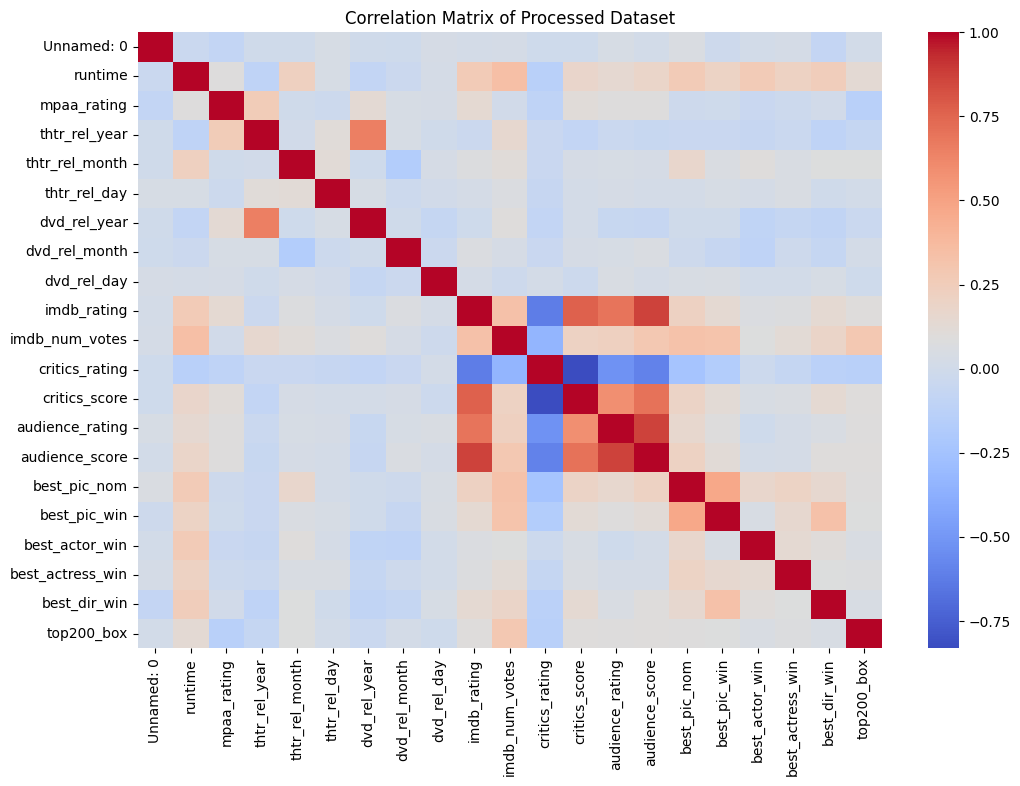

In [31]:
# Step 5: Visualize Important Features (Optional)
# Correlation matrix with only numeric columns
numeric_data = data.select_dtypes(include=[np.number])  # Ensure only numeric columns are selected

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix of Processed Dataset")
plt.show()

# Clustering Model

# Text Mining

# ANN Preprocessing

In [32]:
# Load the dataset
file_path = '../Data/Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv'
data = pd.read_csv(file_path)

In [33]:
# Display the first few rows and dataset information
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [34]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [35]:
# Drop any irrelevant columns (e.g., 'Serial No.')
if 'Serial No.' in data.columns:
    data = data.drop(columns=['Serial No.'])

In [36]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [37]:
# Handling Missing Values (if any)
# Replace missing values in numerical columns with their median
data = data.fillna(data.median())

In [38]:
# Split the data into features and target variable
X = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (400, 7)
Testing data shape: (100, 7)


# ANN Model

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report

# Build the ANN model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Drop irrelevant columns
if 'Serial No.' in data.columns:
    data = data.drop(columns=['Serial No.'])

# Handle missing values
data = data.fillna(data.median())

# Binarize the target variable
data['Chance of Admit '] = (data['Chance of Admit '] >= 0.8).astype(int)

# Split features and target
X = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']

# Normalize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Check class distribution
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:")
print(y_test.value_counts())


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Ensure y_test is binary
y_test = y_test.astype(int)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Print classification report with zero_division parameter
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))


Training set class distribution:
Chance of Admit 
0    276
1    124
Name: count, dtype: int64

Test set class distribution:
Chance of Admit 
0    69
1    31
Name: count, dtype: int64
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6720 - loss: 0.6454 - val_accuracy: 0.8875 - val_loss: 0.5156
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8985 - loss: 0.4918 - val_accuracy: 0.9000 - val_loss: 0.4052
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9037 - loss: 0.3764 - val_accuracy: 0.8875 - val_loss: 0.3301
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9053 - loss: 0.3082 - val_accuracy: 0.9000 - val_loss: 0.2810
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8863 - loss: 0.2759 - val_accuracy: 0.9000 - val_loss: 0.2499
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9143 - loss: 0.2261 - val_accuracy: 0.8875 - val_loss: 0.2310
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy